Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# BIOLOGIJA
## 6.4.2021. 

Ana Zoric 0009/2020

***
<font color='red'>
Preimenovati svesku: File/Rename u __biologija_ime_prezime__<br>
Redovno snimati aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimati fajl: Download as Notebook (.ipynb) </font>
***

#### __Zadatak 1__: Eksponencijalni i logistički rast
Uporediti model eksponencijalnog i logističkog porasta. Diferencijalne jednačine koje definišu ova dva procesa su:<br><br>Eksponencijalni porast:<br><br> $\frac{dx}{dt} = rx$, <br><br>Logistički porast:<br> <br>$\frac{dx}{dt} = rx(1-\frac{x}{K})$, <br><br> gde su $r$ i $K$ stopa porasta i nosivi kapacitet, respektivno, prema definicijama sa slajdova. 

a) Formirati Python skriptu (<font color='blue'>expVSlog.py</font>) koja na vremenskom domenu od 0 do 70 dana (vremensku osu napraviti kao ekvidistantnu podelu u 1000 tačaka), rešava diferencijalnu jednačinu eksponencijalnog rasta kao i jednačinu logističkog rasta. Jednačine treba rešiti za početni uslov $x(0) = 50$ jedinki, za tri slučaja stope rasta $r = 0.1, 0.2, 0.3$ jedinki na dan. U slučaju logističkog rasta, nosivi kapacitet iznosi $K = 500$ jedinki. 

Nacrtati dva grafika:

grafik 1: Reprodukovati levi grafik sa slajda br. 4 iz pripremnog fajla. Na istom grafiku prikazati:<br>
<ol>
<li>Sve tri krive (za sve tri vrednosti stope rasta $r$) koje prestavljaju rešenja diferencijalne jednačine logističkog rasta. Krive treba da budu nacrtane različitim bojama, za koje treba prikazati legendu.</li> 
<li>Dodati horizontalnu isprekidanu liniju crvene boje $x  = K$ (asimptotu kojoj teže sve tri dinamike).</li>
<li>Označiti ose. Dodati grid na grafik.</li>
</ol>

grafik 2: Reprodukovati desni grafik sa slajda br. 4 iz pripremnog fajla koji poredi eksponencijalni porast sa logističkim porastom. Na istom grafiku prikazati:
<ol>
<li>Sve tri krive (za sve tri vrednosti stope rasta $r$) koje prestavljaju rešenja diferencijalne jednačine logističkog rasta. Krive treba da budu nacrtane različitim bojama, za koje treba prikazati legendu.</li> 
<li>Sve tri krive (za sve tri vrednosti stope rasta $r$) koje predstavljaju rešenja diferencijalne jednačine eksponencijalnog rasta. Sve tri krive treba da budu nacrtane sivom bojom kao isprekidane linije.</li>
<li>Dodati horizontalnu isprekidanu liniju crvene boje $x  = K$ (asimptotu kojoj teže sve tri dinamike).</li>
<li>Označiti ose. Dodati grid na grafik.</li> 
</ol>    
Da bi grafik bio pregledan (zbog velikog porasta eksponencijalne funkcije), postaviti limit za $y$ osu grafika tako da ide od 0 do 600, pomoću naredbe <font color='blue'>plt.ylim((0,600))</font>. 

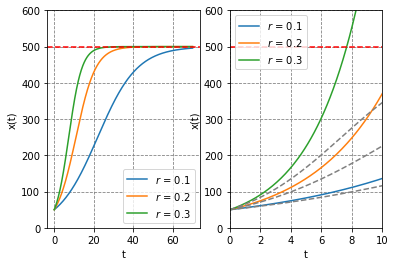

In [45]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
from scipy.integrate import odeint

fexp = lambda x,t,r: r*x
flog = lambda x,t,r,k: x*r*(1 - x/k)

t=np.linspace(0,70,1000)
rr=[0.1, 0.2, 0.3]
k=500
x0=50

_,axis=plt.subplots(1,2)
axis[0].set_ylim((0, 600))
axis[1].set_xlim((0, 10))
axis[1].set_ylim((0, 600))
for r in rr:
    int_exp=odeint(fexp,x0,t,(r,))
    int_log=odeint(flog,x0,t,(r, k))
    axis[0].plot(t,int_log,label=f'$r$ = {r}')
    axis[1].plot(t,int_exp,label=f'$r$ = {r}')
    axis[1].plot(t,int_log,color='gray', linestyle='--')
for i in range(2):
    axis[i].axhline(k, linestyle='--', color='red')
    axis[i].grid(b=True, which='both', color='grey', linestyle='--')
    axis[i].legend()
    axis[i].set_xlabel('t')
    axis[i].set_ylabel('x(t)')
plt.show()

b) Zašto se eksponencijalni i logistički brže razilaze kada je stopa rasta $r$ veća? 

zbog toga sto u slucaju logistickog resenja, kolicina populacije pre dostigne maksimalnu vrednost

c) Napraviti novu Python skriptu (<font color='blue'>sunflower.py</font>) koja učitava fajl sunflower_data.csv i kroz eksperimentalne podatke provlači eksponencijalni i logistički model (reprodukovati grafik za slajda br. 6 u pripremnom fajlu).<br>

Skica postupka: Pomoću naredbe <font color='blue'>pd.read_csv</font> učitati fajl sunflower_data.csv. Nacrtati grafik zavisnosti kolone Height od kolone Age, pri čemu grafik treba da bude tipa scatter, sa markerima tamno crvene boje (DarkRed), veličine 10. 
Zatim, za $r = 0.1$ rešiti diferencijalne jednačine eksponencijalnog i logističkog rasta i dodati te dve krive na postojeći grafik. Uneti legendu, obeležiti ose grafika, postaviti grid, a limit za y osu postaviti da bude od 0 do 280. Vremensku osu napraviti od $tmin$ do $tmax$ u 200 tačaka. Za $tmin$ uzeti minimalni element kolone Age, za $tmax$ uzeti maksimalni element kolone Height. Za vrednost nosivog kapaciteta $K$, uzeti maksimalni element kolone Height. Za početni uslov $x(0)$ uzeti prvi element kolone Height koji odgovara prvom vremenskom trenutku za koji imamo podatke. 

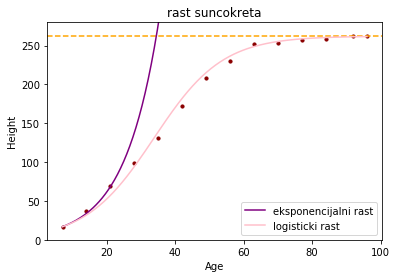

In [46]:
import pandas as pd

sf=pd.read_csv("sunflower_data.csv")
r=0.1
k=sf.Height.max(); x0=sf.Height[0]
sf.plot(kind="scatter", x="Age", y="Height", color="DarkRed", s=10)
t = np.linspace(sf.Age.min(), sf.Age.max(), 200)

plt.title('rast suncokreta')
plt.ylim((0, 280))
plt.axhline(k, linestyle='--', color='orange')
rez1=odeint(fexp,x0,t,(r,))
rez2=odeint(flog,x0,t,(r,k))

plt.plot(t,rez1,color="purple", label="eksponencijalni rast")
plt.plot(t,rez2,color="pink", label="logisticki rast")

plt.legend()
plt.show()

d) Sa grafika oceniti vremenski trenutak do koga eksponencijalni model dovoljno dobro prati eksperimentalne podatke.

do dvadesetog (20) dana je eksponencijalni model dovoljno dobar

***
<font color='red'>Snimiti aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimiti fajl: Download as Notebook (.ipynb) </font>
***

#### __Zadatak 2__: Lotka-Volterra model

a) U okviru nove Python skripte (lv_model.py) formirati Python funkciju koja predstavlja sistem diferencijalih jednačina koje odgovaraju Lotka-Volterra modelu bez logističkog rasta prey vrste (lovine):

<br>$\frac{dx}{dt} = r_{prey}x - axy$<br>
<br>$\frac{dy}{dt} = -r_{predator}y + bxy$



Pomoću pandas biblioteke učitati fajl (lvm_data.csv) sa eksperimentalnim podacima o zečevima i lisicama. Na osnovu eksperimentalnih podataka dolazi se do sledećih vrednosti za parametre Lotka-Volterra sistema jednačina: $r_{prey} = 0.4807$, $a = 0.02482$, $r_{predator} = 0.9272$, $b = 0.02756$. Po uzoru na zadatak sa rastom suncokretove stabljike, zaključiti kako treba napraviti vremensku osu i postaviti početne uslove.

Nacrtati grafik na kome treba prikazati eksperimentalne podatke za zečeve (scatter plot, DarkRed tačke veličine 10) i krivu dinamike zečeva koja se dobija iz rešavanja Lotka-Volterra sistema (reprodukovati grafik sa slajda br. 10 iz pripremnog fajla). Označiti ose, postaviti grid i staviti legendu. 


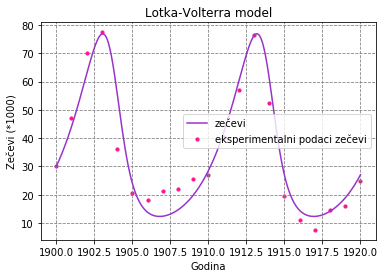

In [47]:
zl=pd.read_csv("lvm_data.csv")
#r1-r_prey, r2-r_predator
r1=0.4807; r2=0.9727
a=0.02482; b=0.02756

zl.plot(kind='scatter', x='Godina', y='Zec', s = 10, color='deepPink', label='eksperimentalni podaci zečevi')
t = np.linspace(zl.Godina.min(), zl.Godina.max(), 200)
y0 = [zl.Zec[0], zl.Lisica[0]]

def fja(y0,t,r1,r2,a,b):
    x,y=y0
    return ([r1*x-a*x*y,-r2*y+b*x*y])

rez=odeint(fja,y0,t,(r1,r2,a,b))
plt.grid(b=True, which='both', color='grey', linestyle='--')
plt.title('Lotka-Volterra model')
plt.ylabel('Zečevi (*1000)')
plt.xlabel('Godina')
plt.plot(t, rez[:, 0], label='zečevi', color="darkOrchid")

plt.legend()
plt.show()


Nacrtati grafik na kome treba prikazati eksperimentalne podatke za lisice (scatter plot, DarkRed tačke veličine 10) i krivu dinamike lisica koja se dobija iz rešavanja Lotka-Volterra sistema (reprodukovati grafik sa slajda br. 11 iz pripremnog fajla). Označiti ose, postaviti grid i staviti legendu.

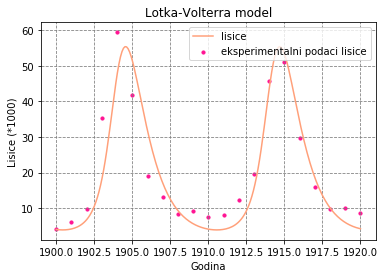

In [48]:
zl.plot(kind='scatter', x='Godina', y='Lisica', s = 10, color='deepPink', label='eksperimentalni podaci lisice')
plt.grid(b=True, which='both', color='grey', linestyle='--')
plt.title('Lotka-Volterra model')
plt.ylabel('Lisice (*1000)')
plt.xlabel('Godina')
plt.plot(t, rez[:, 1], label='lisice', color="lightSalmon")

plt.legend()
plt.show()

Nacrtati grafik na kome treba prikazati krive dinamike zečeva i lisica koje se dobijaju iz rešavanja Lotka-Volterra sistema na novoj vremenskoj skali koja je produžena za još 50 godina u odnosu na prethodnu (reprodukovati grafik sa slajda br. 12 iz pripremnog fajla). Označiti ose, postaviti grid i staviti legendu. 

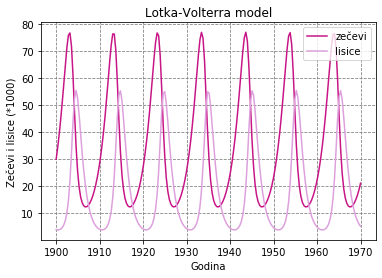

In [49]:
t = np.linspace(zl.Godina.min(), zl.Godina.max() + 50, 200)
rez = odeint(fja, y0, t, (r1, r2, a, b))
plt.grid(b=True, which='both', color='grey', linestyle='--')
plt.title('Lotka-Volterra model')
plt.ylabel('Zečevi i lisice (*1000)')
plt.xlabel('Godina')
plt.plot(t, rez[:, 0], label='zečevi', color="mediumVioletRed")
plt.plot(t, rez[:, 1], label='lisice', color="plum")

plt.legend()
plt.show()

Proceniti ugaonu frekvenciju oscilovanja lisica, kao i zečeva i proveriti da li se slaže sa formulom datom na slajdu br. 12 iz pripremnog fajla.

- Vrednosti zeceva i lisica se ponavljaju posle $n \approx 9.7$ godina.
- Odatle im je frekvencija oscilovanja (posto je ista za obe populacije) $\nu = \frac{1}{n} = 0.10309$.
- Iz toga dobijamo ugaonu frekvenciju oscilovanja lisica $\omega = 2\pi\nu = 0.64775$.
- Iz formule sa slajda dobijamo $\omega = \sqrt{0.4807 \cdot 0.9272} = 0.66761$, što jeste slično prethodno dobijenoj ugaonoj frekvenciji.

Nacrtati fazni dijagram koji odgovara prethodnom vremenskom dijagramu (reprodukovati grafik sa slajda br. 13 iz pripremnog fajla). Označiti ose, postaviti grid i staviti legendu. Uneti verikalnu i horizonatlnu isprekidanu liniju crvene boje, tako da se u preseku definiše stacionarno stanje ovakvih oscilacija. 

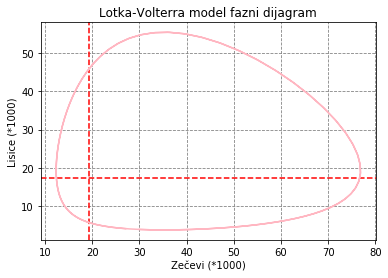

In [50]:
t = np.linspace(zl.Godina.min(), zl.Godina.max(), 200)
rez = odeint(fja, y0, t, args=(r1, r2, a, b))
plt.grid(b=True, which='both', color='grey', linestyle='--')
plt.title('Lotka-Volterra model fazni dijagram')
plt.ylabel('Lisice (*1000)')
plt.xlabel('Zečevi (*1000)')
plt.axhline(r1/b, linestyle='--', color='red')
plt.axvline(r1/a, linestyle='--', color='red')

plt.plot(rez[:, 0], rez[:, 1], color="lightPink")
plt.show()

Kog oblika je fazni dijagram i zašto?

gotovo kruznog oblika, zbog toga sto se kolicina populacije lisica i zeceva ponavlja tokom vremena

b)	Simulirati Lotka-Volterra model sa logističkim rastom za $prey$ vrstu:

<br>$\frac{dx}{dt} = r_{prey}(1-\frac{x}{K}) - axy$<br>
<br>$\frac{dy}{dt} = -r_{predator}y + \epsilon bxy$

U Python skripti (<font color='blue'>lv_logistic_model.py</font>) reprodukovati grafike sa slajda br. 15. iz pripremnog fajla. Za početne uslove koji odgovaraju početnim uslovima iz prethodnog zadatka, za parametre koji odgovaraju parametrima iz prethodnog zadatka (uz dodatak $K = 250$, $\epsilon = 0.9$), na vremenskoj skali od 1900. do 2100. godine u 1000 ekvidistantnih tačaka, rešavati sistem diferencijalnih jednačina. 

Nacrtati vremenski dijagram lisica i zečeva na kome treba označiti ose grafika, postaviti grid i uneti legendu.

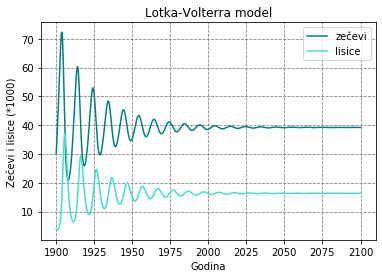

In [51]:
k = 250
ep = 0.9

def fja2(y0, t, r1, r2, a, b, k, ep):
    x, y = y0
    return [r1 * x * (1 - x/k) - a * x * y,-r2 * y + ep * b * x * y]

t = np.linspace(1900, 2100, 1000)
rez = odeint(fja2, y0, t, (r1, r2, a, b, k, ep))
plt.plot(t, rez[:, 0], label='zečevi', color="teal")
plt.plot(t, rez[:, 1], label='lisice', color="turquoise")
plt.title('Lotka-Volterra model')
plt.ylabel('Zečevi i lisice (*1000)')
plt.xlabel('Godina')
plt.grid(b=True, which='both', color='grey', linestyle='--')
plt.legend()
plt.show()

Nacrtati fazni dijagram dinamike lisica i zečeva, na kome treba označiti ose grafika i postaviti grid.

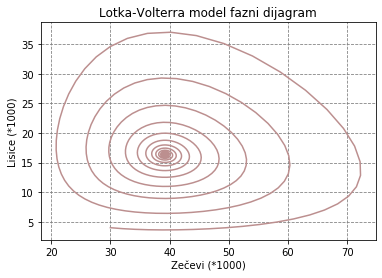

In [52]:
plt.grid(b=True, which='both', color='grey', linestyle='--')
plt.title('Lotka-Volterra model fazni dijagram')
plt.ylabel('Lisice (*1000)')
plt.xlabel('Zečevi (*1000)')
plt.plot(rez[:, 0], rez[:, 1],color="rosyBrown")

plt.show()

Kog oblika je fazni dijagram i zašto?

dijagram je spiralnog oblika jer nakon nekog vremena populacija dostigne stacionarno stanje, koje je moguce zbog kapaciteta K koji obezbedjuje prigusene oscilacije